## Generazione istanze

85.90692637965812

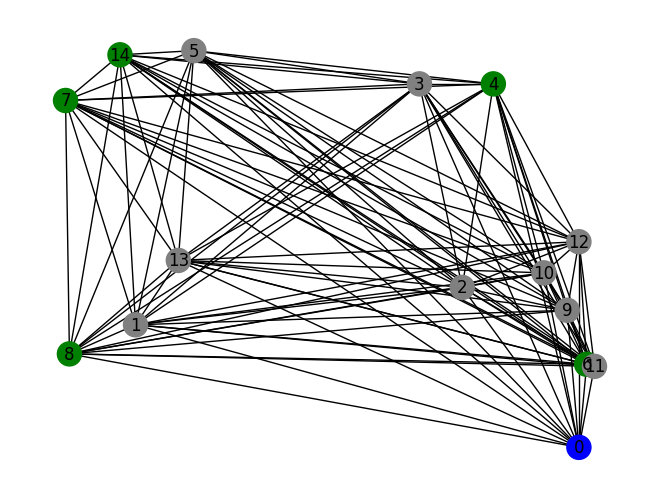

In [114]:
import networkx as nx 
import utility_function as uf

#generate a random graph
G=uf.random_euclidean_graph(15, 200)

#draw the graph with the type of node
uf.draw_graph(G)

#export in GML file
#nx.write_gml(G, "graph.gml")
G[1][2]['weight']

## Euristica greedy

Euristica Greedy per il problema GTSP

### Nearest Neighbour (variante con autonomia)

A partire dal deposito di sceglie di spostarsi verso il cliente più vicino. Prima di farlo però si controlla che una volta raggiunto il nodo successivo sia possibile raggiungere la colonnina più vicina (altrimenti si resterebbe bloccati). Se non è possibile raggiungere la colonnina più vicina si sceglie la seconda più vicina e così via.

In alcuni potrebbe non riuscire a trovare una soluzione ammissibile e bloccarsi ritornando None.

Per evitare loop fra colonnine si tiene traccia di quelle già visitate e se si ritorna in una già vista si blocca l'algortimo ritornando None. Ogni volta che si visita un cliente si resetta la lista delle colonnine visitate.

È una variante dell'algoritmo Nearest Neighbour per il TSP.

In [2]:
import networkx as nx 
import utility_function as uf

def greedy_nearest_neighbour(G : nx.Graph, batteria_max : int):
    
    clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
    collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

    #inizializzazione
    nodo_attuale = 0
    batteria = batteria_max
    nodi_visitati = []
    nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volta
    soluzione = [0]
    collonnine_visitate = [] #per evitare cicli
    batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

    soluzione_trovata = True

    for _ in range(2): #sserve imporre che l'ultimo nodo sia il deposito (quando ho visitato tutti i nodi aggiungo il deposito ai nodi da visitare)
        while len(nodi_da_visitare) > 0:
            print(nodi_da_visitare)
            #get the nearest node (cliente)
            nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, nodi_da_visitare)

            #check if the battery is enough to go to the nearest node and to reach the nearest charging station
            if batteria - nodo_prossimo[0] - uf.get_nearest_node(G, nodo_prossimo[1], collonnine)[0] < 0:
            
                print("batteria insufficiente")

                #go to the nearest charging station
                nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, collonnine) #la colonnina più vicina
                
                #se vero allora sono in loop e non posso raggiungere nessun cliente
                if(int(nodo_prossimo[1]) in collonnine_visitate):
                    print("sono in una colonnina ma non ho abbastanza batteria per raggiungere un cliente")
                    soluzione_trovata = False
                    break

                collonnine_visitate.append(nodo_prossimo[1])

                #aggiornamento dello stato
                batteria = batteria_max
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)
            else:
                #aggiornamento dello stato
                batteria -= nodo_prossimo[0]
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                nodi_da_visitare.remove(nodo_attuale)
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)

                collonnine_visitate=[]
            
            print("nodo attuale: ", nodo_attuale, "batteria: ", batteria, "nodi da visitare: ", nodi_da_visitare, "soluzione: ", soluzione)
        
        print("torno al deposito")
        nodi_da_visitare=[0]

    if soluzione_trovata != False:
        #soluzione.append(0)
        print("soluzione: ", soluzione)
        return soluzione, batteria_per_nodo
    else:
        return None
    

[1, 4, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  4 batteria:  144.34314575050763 nodi da visitare:  [1, 5, 6, 7, 8, 10, 11, 13, 14] soluzione:  [0, 4]
[1, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  10 batteria:  107.28913112320981 nodi da visitare:  [1, 5, 6, 7, 8, 11, 13, 14] soluzione:  [0, 4, 10]
[1, 5, 6, 7, 8, 11, 13, 14]
nodo attuale:  13 batteria:  65.42028829229318 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13]
[1, 5, 6, 7, 8, 11, 14]
batteria insufficiente
nodo attuale:  3 batteria:  150 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13, 3]
[1, 5, 6, 7, 8, 11, 14]
nodo attuale:  14 batteria:  111.7900536509144 nodi da visitare:  [1, 5, 6, 7, 8, 11] soluzione:  [0, 4, 10, 13, 3, 14]
[1, 5, 6, 7, 8, 11]
nodo attuale:  11 batteria:  84.13142027903574 nodi da visitare:  [1, 5, 6, 7, 8] soluzione:  [0, 4, 10, 13, 3, 14, 11]
[1, 5, 6, 7, 8]
nodo attuale:  5 batteria:  57.11290810682314 nodi da visitare:  [1, 6, 7, 8] soluzione:  [0, 4, 10, 

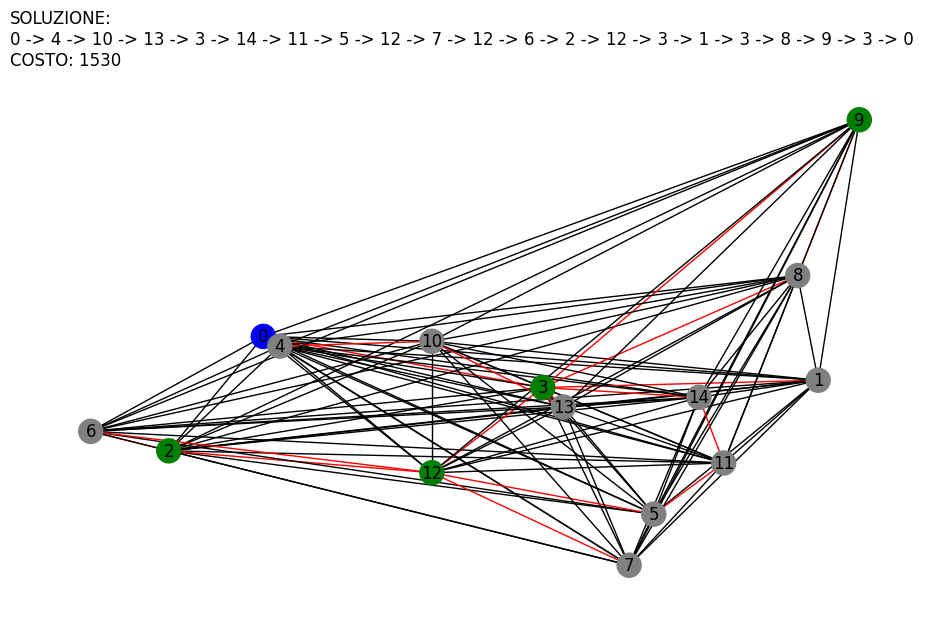

In [3]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_nearest_neighbour(G,batteria_max)

#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G, soluzione, batteria_per_nodo)
    print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)




In [41]:
#get weight of edge 1->2

G[9][3]["weight"]


134.27211177307072

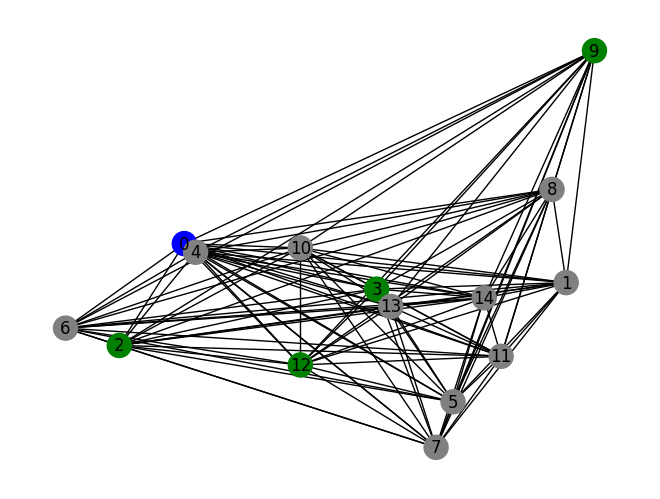

In [21]:
import networkx as nx
import utility_function as uf
graph_file = "istances/graph.gml"
G = nx.read_gml(graph_file, destringizer=int)
uf.draw_graph(G)

# Cheapest Insertion 
1. Parto sempre dal deposito e un cliente con l'arco più corto, ovvero quello che minimizza d(i, j) con i = 0 e j un cliente. **CONTROLLO:** devo poter raggiungere una colonnina arrivata a j.
2. Trovo il cliente il cui inserimento nel tour causa il minore aumento di lunghezza, ovvero il cliente k che minimizza d(i, k) + d(k, j) - d(i, j) con (i, j) un arco nel tour parziale. K potrebbe anche essere una colonnina.
3. Inserisco k tra i e j.
4. Ripeto fino a che non ho inserito tutti i clienti.    
5. Devo terminare in D.


In [35]:
import networkx as nx
import utility_function as uf

def greedy_cheapest_insertion(G : nx.Graph, batteria_max : int):
        #inizializzazione liste dal grafo di partenza
        clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
        collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

        nodo_attuale = 0
        nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volt  
        batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

        soluzione_trovata = True

        #inizializzazione soluzione
        
        # inizio il tour dal deposito 
        tour = [nodo_attuale]
        #print(nodi_da_visitare)
        # trovo il nodo più vicino al deposito
        first_best = uf.get_nearest_node(G, nodo_attuale, nodi_da_visitare)
        # aggiungo il nodo alla soluzione
        #first_best è una tupla (dist, nodo)
        tour.append(first_best[1])
        tour.append(0)
        nodi_da_visitare.remove(first_best[1])
                
        while len(nodi_da_visitare) > 0:
                
                best_inserzione = (int(1000000000),0)
                # funzione che per ogni coppia di nodi in tour trova il nodo più vicino e lo inserisce
                for i in range(len(tour)-1):
                        
                        #prendo a due a due i nodi in tour 
                        nodo_attuale = tour[i]
                        nodo_successivo = tour[i+1]

                        #trovo il nodo più vicino a nodo_attuale e nodo_successivo
                        inserzione = uf.cheapest_deviation(G, nodo_attuale, nodo_successivo, nodi_da_visitare)
                        #coppia costo totale deviazione e nodo da cui passare
                        
                        if inserzione[0] < best_inserzione[0]:
                                best_inserzione = inserzione
                                

                #inserisco il nodo nella soluzione
                tour.insert(i+1,best_inserzione[1])
                nodi_da_visitare.remove(best_inserzione[1])
                #print(tour)

        for j in range(1,len(tour)):
                batteria =batteria_per_nodo[j-1]- G[tour[j-1]][tour[j]]['weight'] 
                batteria_per_nodo.append(batteria)

        return tour, batteria_per_nodo   

def add_colonnine_to_tour(G : nx.Graph, tour : list, batteria_per_nodo : list, batteria_max : int):
        #controllo che ci sia un valore di batteria per ogni nodo del tour
        if(len(batteria_per_nodo) != len(tour)):
                print("errore: lunghezza batteria per nodo diversa da lunghezza tour")
                return None
        #scorro la lista finché nessun tratto sia negativo
        while(uf.check_batteria_negativa(batteria_per_nodo)):

                for i in range(len(tour)-1,0,-1):
                #for i in range(0,len(tour)):
                        print("i: ", i)
                        if(batteria_per_nodo[i] < 0):
                                print("Sistemo un nodo")
                                #devo aggiungere una colonnina prima di tour[i]
                                tour, batteria_per_nodo = add_colonnina_before_i(G, tour, batteria_max, i)
                                break
        return tour, batteria_per_nodo

def add_colonnina_before_i(G : nx.graph, tour : list, batteria_max : int, i : int):
        colonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]
        best_inserzione = (int(1000000000),0)
        for j in range(0,i): #i nodo batteria negativa
                        
                #prendo a due a due i nodi in tour 
                nodo_attuale = tour[j]
                nodo_successivo = tour[j+1]

                

                temp_tour = tour.copy()

                #trovo il nodo più vicino a nodo_attuale e nodo_successivo
                inserzione = uf.cheapest_deviation(G, nodo_attuale, nodo_successivo, colonnine)
                print("inserisco fra ", nodo_attuale, " e ", nodo_successivo, "colonnina:" , inserzione[1])
                temp_tour.insert(j+1,inserzione[1])
                batteria_per_nodo_temp = uf.calcolo_batteria_per_nodo(G,temp_tour,batteria_max)
                #coppia costo totale deviazione e nodo da cui passare

                print("temp tour; ", temp_tour)
                print("batteria per nodo temp: ", batteria_per_nodo_temp)
                
                if inserzione[0] < best_inserzione[0] and batteria_per_nodo_temp[i+1] > 0:
                        print("best inserzione trovata")
                        best_inserzione = inserzione
                        best_tour = temp_tour
                        best_batteria_per_nodo = batteria_per_nodo_temp

        return best_tour, best_batteria_per_nodo




i:  11
Sistemo un nodo
inserisco fra  0  e  4 colonnina: 2
temp tour;  [0, 2, 4, 10, 6, 13, 14, 11, 1, 5, 7, 8, 0]
batteria per nodo temp:  [150, 150, 99.22599090085558, 62.17197627355777, -28.701562229132882, -144.13552603528484, -177.37706631247417, -205.03569968435283, -246.0844511879004, -314.0918037315776, -335.9321333994192, -461.7971404506246, -594.1791633993619]
inserisco fra  4  e  10 colonnina: 3
temp tour;  [0, 4, 3, 10, 6, 13, 14, 11, 1, 5, 7, 8, 0]
batteria per nodo temp:  [150, 144.34314575050763, 150, 116.98485196156165, 26.111313458870995, -89.32265034728096, -122.56419062447029, -150.22282399634895, -191.27157549989653, -259.2789280435737, -281.1192577114153, -406.98426476262074, -539.366287711358]
inserisco fra  10  e  6 colonnina: 2
temp tour;  [0, 4, 10, 2, 6, 13, 14, 11, 1, 5, 7, 8, 0]
batteria per nodo temp:  [150, 144.34314575050763, 107.28913112320981, 150, 129.3844718719117, 13.950508065759749, -19.291032211429574, -46.94966558330823, -87.99841708685582, -156.0

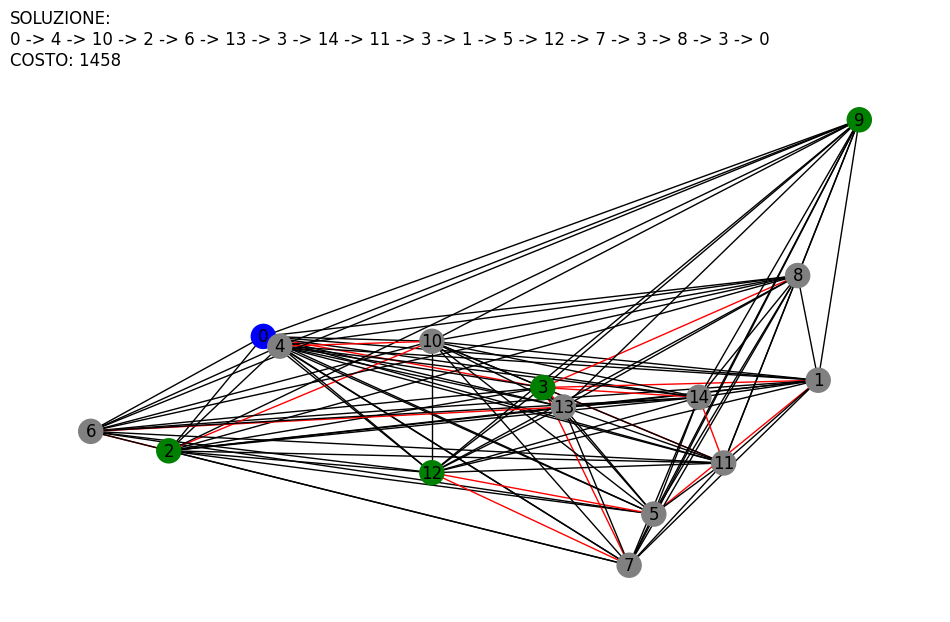

In [36]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza

graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_cheapest_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie
soluzione, batteria_per_nodo = add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)


#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G,soluzione, batteria_per_nodo)
   
    #costo = uf.costo(G, soluzione, batteria_per_nodo)
    #print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)

In [17]:
import networkx as nx
import utility_function as uf

#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_cheapest_insertion(G,batteria_max)
        
        
        

[0, 4, 10, 0]
[0, 4, 10, 6, 0]
[0, 4, 10, 6, 13, 0]
[0, 4, 10, 6, 13, 14, 0]
[0, 4, 10, 6, 13, 14, 11, 0]
[0, 4, 10, 6, 13, 14, 11, 1, 0]
[0, 4, 10, 6, 13, 14, 11, 1, 5, 0]
[0, 4, 10, 6, 13, 14, 11, 1, 5, 7, 0]
[0, 4, 10, 6, 13, 14, 11, 1, 5, 7, 8, 0]
